### Manually doing simple regression with NumPy

In [1]:
# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the regression analysis function 
def estimate_coef(x, y):
    # Specify the size or number of points.
    n = np.size(x)  

    # Calculate the mean of x and y.
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the cross-deviation and deviation around x.
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x

    # Calculate the regression coefficients.
    m = SS_xy / SS_xx
    b = mean_y - m*mean_x

    return (b, m)

In [3]:
def plot_regression_line(x, y, b):
    # Use scatterplot to plot the actual points.
    plt.scatter(x, y, color = "g",
               marker = "o", s = 30)
 
    # Set the predicted response vector using the linear equation.
    y_pred = b[0] + b[1]*x
 
    #  Plot the regression line (in red).
    plt.plot(x, y_pred, color = "r")
 
    # Add two labels for clarity.
    plt.xlabel('x')
    plt.ylabel('y')
 
    # Set a function to display the plot.
    plt.show()

Estimated coefficients:
c = 8362.602405110887            
m = 12909.488913942112


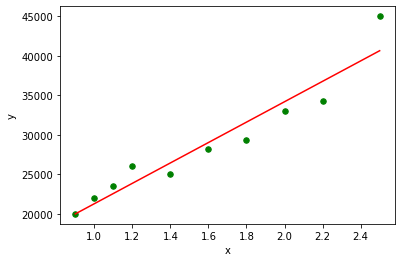

In [4]:
def main():
    # Enter small data set by hand as an array.
    x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
    y = np.array([20000, 22000, 23500, 26000, 25000, 28250,
                  29300, 33000, 34255, 45000])

    # Calculate the coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(b[0], b[1]))

    # Plot the regression line (i.e. y = mx + c).
    plot_regression_line(x, y, b)
 
main()

### Can use polyfit() from NumPy instead of manually doing it (as above)

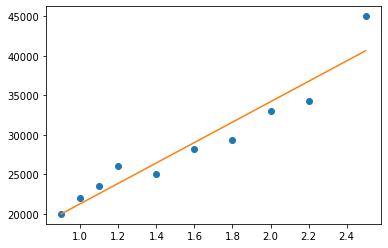

In [5]:
# Re-enter the values of x and y in your Notebook.
x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
y = np.array([20000, 22000, 23500, 26000, 25000, 28250, 29300, 33000, 34255, 45000])

# Create a basic scatterplot.
plt.plot(x, y, 'o')  

# Obtain m (slope) and c (intercept) of the linear regression line.
m, c = np.polyfit(x, y, 1)

# Add the linear regression line to the scatter plot.
plt.plot(x, m*x+c)

### Can also use <i>ols</i> from Statsmodel

In [6]:
# Import statsmodels, NumPy, Pandas, and Matplotlib.
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and read the data file:
df_test = pd.read_csv('LSE_DA301_Week_1_files/Data/test.csv')

df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


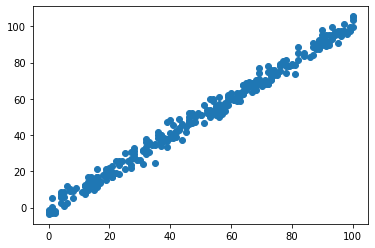

In [7]:
# Define the dependent variable.
y = df_test['y'] 

# Define the independent variable.
x = df_test['x'] 

# Check for linearity.
plt.scatter(x, y) 

In [8]:
# fit the model

# (Note: this formula is in the style of R language)
# 'y ~ x' signifies dependent var and independent var. For our data this equates to
# 'Price ~ Size'

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df_test).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.33e-294
Time:                        18:54:03   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -0.461811
x            1.014335
dtype: float64
Standard errors:  Intercept    0.359560
x            0.006162
dtype: float64
Predicted values:  [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  6

In [10]:
# Set the the x coefficient to ‘1.0143’ and the constant to ’0.4618’ to generate the regression table.
y_pred = 1.0143 * df_test['x'] - 0.4618

y_pred

0      77.6393
1      20.8385
2      21.8528
3      19.8242
4      36.0530
        ...   
295    71.5535
296    46.1960
297    55.3247
298    62.4248
299    47.2103
Name: x, Length: 300, dtype: float64

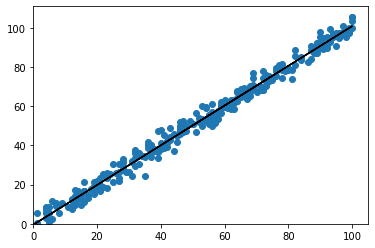

In [11]:
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()